In [ ]:
from icecream import ic

# Numerical & Dataframe Libraries
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Visualisation Libraries
import plotly.express as px
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 8)

# File Operations and OS Libraries
from glob import glob
import os

# Cainiao Dataset

## Initialise Environment Variables

In [ ]:
LADE_PATH = "/work/LaDe-D/"

In [ ]:
print(glob(LADE_PATH + "*"))

['/work/LaDe-D/delivery_cq.parquet', '/work/LaDe-D/delivery_hz.parquet', '/work/LaDe-D/delivery_jl.parquet', '/work/LaDe-D/delivery_sh.parquet', '/work/LaDe-D/delivery_yt.parquet']


## Read Dataset for Jilin City

### Initialise Dataset

In [ ]:
df = pd.read_parquet(LADE_PATH + "delivery_jl.parquet")
display(df)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,3322376,31,Jilin,4849,126.56526,43.84112,94,14,09-25 08:08:00,09-25 08:08:00,126.56614,43.87092,09-25 11:32:00,09-25 11:32:00,126.56919,43.84248,925
1,4093119,31,Jilin,4849,126.56519,43.84110,94,14,08-21 09:11:00,08-21 09:11:00,126.56611,43.87081,08-21 15:00:00,08-21 15:00:00,126.56939,43.84269,821
2,36226,31,Jilin,4849,126.56987,43.85017,235,14,06-08 15:42:00,06-08 15:42:00,126.56612,43.87074,06-08 17:24:00,06-08 17:24:00,126.57628,43.84771,608
3,3950697,31,Jilin,4849,126.56984,43.85005,235,14,09-03 14:03:00,09-03 14:03:00,NaN,NaN,09-03 16:31:00,09-03 16:31:00,126.56815,43.85131,903
4,4455630,31,Jilin,4849,126.56991,43.85006,235,14,06-07 14:54:00,06-07 14:54:00,126.56597,43.87104,06-07 16:58:00,06-07 16:58:00,126.57030,43.84985,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31410,3383266,165,Jilin,3156,126.55005,43.90468,60052,1,07-31 09:24:00,07-31 09:24:00,126.58485,43.89466,07-31 16:40:00,07-31 16:40:00,126.55038,43.90408,731
31411,1489549,165,Jilin,3156,126.55065,43.90457,60052,1,06-28 08:55:00,06-28 08:55:00,NaN,NaN,06-28 15:06:00,06-28 15:06:00,126.55025,43.90383,628
31412,3974744,165,Jilin,3156,126.54986,43.90503,60052,1,07-20 08:41:00,07-20 08:41:00,NaN,NaN,07-20 16:20:00,07-20 16:20:00,126.55047,43.90402,720
31413,2169583,165,Jilin,3156,126.55059,43.90421,60052,1,07-02 09:04:00,07-02 09:04:00,126.58472,43.89470,07-02 14:23:00,07-02 14:23:00,126.55043,43.90417,702


In [ ]:
df.nunique()

order_id             31415
region_id                4
city                     1
courier_id              57
lng                   8224
lat                   9482
aoi_id                1259
aoi_type                14
accept_time          11200
accept_gps_time      11200
accept_gps_lng         973
accept_gps_lat         907
delivery_time        25427
delivery_gps_time    25427
delivery_gps_lng      8399
delivery_gps_lat      9740
ds                     163
dtype: int64

#### Hierarchy of Dataset

In [ ]:
# Hierarchy of the Dataset
['city', 'region_id', 'aoi_id', 'order_id'] 

# Note: 
# 'ds' (date) would be between 'city' and 'region_id' if included. 
# 'courier_id' would be between 'region_id' and 'aoi_id'
# 'aoi_type' would be between 'region_id' and 'aoi_id' but can be excluded.

['city', 'region_id', 'aoi_id', 'order_id']

### Remove Rows with NaN and Irrelevant Coordinate values

Missing values for accept_gps_lng and accept_gps_lat

In [ ]:
df.isna().sum()

order_id               0
region_id              0
city                   0
courier_id             0
lng                    0
lat                    0
aoi_id                 0
aoi_type               0
accept_time            0
accept_gps_time        0
accept_gps_lng       955
accept_gps_lat       955
delivery_time          0
delivery_gps_time      0
delivery_gps_lng       0
delivery_gps_lat       0
ds                     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.nunique()

order_id             30460
region_id                4
city                     1
courier_id              53
lng                   8172
lat                   9180
aoi_id                1241
aoi_type                14
accept_time          10724
accept_gps_time      10724
accept_gps_lng         973
accept_gps_lat         907
delivery_time        24719
delivery_gps_time    24719
delivery_gps_lng      8348
delivery_gps_lat      9431
ds                     161
dtype: int64

## Plot coordinates

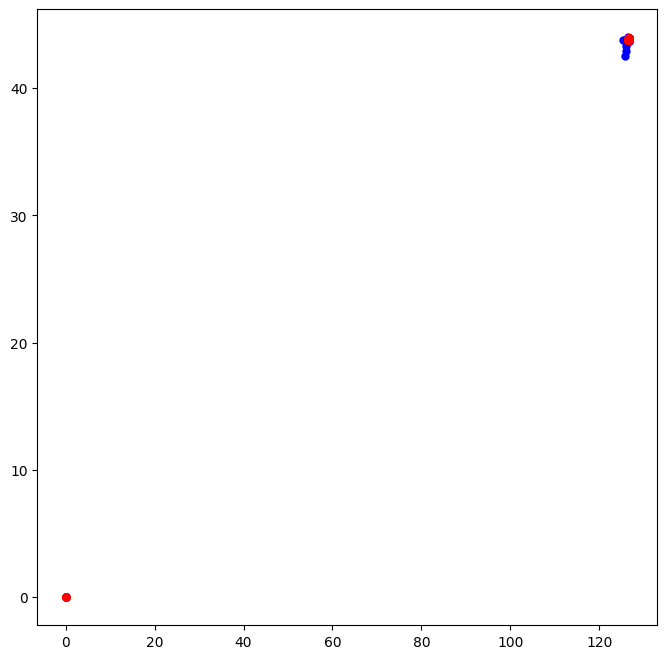

In [ ]:
plt.scatter(x=df['delivery_gps_lng'], y=df['delivery_gps_lat'], c="blue", s=25)
# plt.scatter(x=df['lng'], y=df['lat'], c="red")
plt.scatter(x=df['accept_gps_lng'], y=df['accept_gps_lat'], c="red", s=25)

plt.show()

Filter coordinates with zero values

In [ ]:
df = df[(df["lng"] > 20) & (df["lat"] > 20) \
        & (df["accept_gps_lng"] > 20) & (df["accept_gps_lat"] > 20) \
        & (df["delivery_gps_lng"] > 20) & (df["delivery_gps_lat"] > 20)]

In [ ]:
df.nunique()

order_id             30450
region_id                4
city                     1
courier_id              53
lng                   8170
lat                   9180
aoi_id                1241
aoi_type                14
accept_time          10721
accept_gps_time      10721
accept_gps_lng         965
accept_gps_lat         898
delivery_time        24713
delivery_gps_time    24713
delivery_gps_lng      8346
delivery_gps_lat      9429
ds                     161
dtype: int64

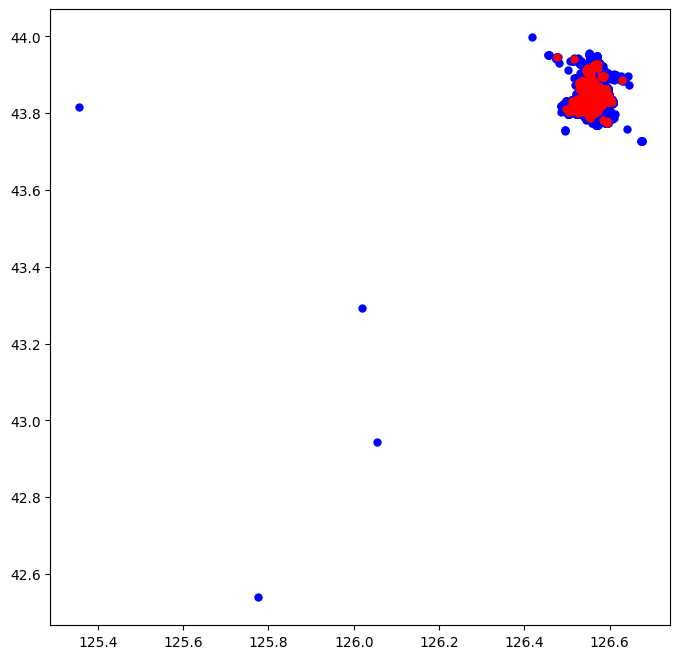

In [ ]:
plt.scatter(x=df['delivery_gps_lng'], y=df['delivery_gps_lat'], c="blue", s=25)
# plt.scatter(x=df['lng'], y=df['lat'], c="red")
plt.scatter(x=df['accept_gps_lng'], y=df['accept_gps_lat'], c="red", s=25)

plt.show()

## Number of Orders by Date

In [ ]:
df['ds'].value_counts().sort_index()

ds
513       7
514      28
515      19
516     139
517     188
518      80
519      58
520      87
521      64
522      19
523       4
524      89
525      51
526      41
527      74
528     130
529     423
530     278
531     176
601     241
602      24
603     269
604     243
605     100
606     142
607     170
608     253
609     248
610     213
611     241
612     219
613     227
614     224
615     145
616      85
617     321
618     420
619     279
623       7
624      33
625      30
626      85
627     252
628     254
629     258
630     240
701     174
702     209
703     217
704     206
705     192
706     211
707     191
708     182
709     158
710     137
711     129
712     138
713     128
714     243
715     225
716     218
717     229
718     220
719     210
720     183
721     230
722     246
723     231
724     238
725     261
726     264
727     343
728     230
729     219
730     276
731     238
801     239
802     221
803     281
804     231
805     165
806     184
8

## Visualise Data Hierarchy

In [ ]:
data = df[['city', 'ds', 'region_id', 'courier_id', 'aoi_type', 'aoi_id', 'order_id']].copy()
data["dummy"] = 1
# data = data[data['ds'] == 925]
display(data)

,city,ds,region_id,courier_id,aoi_type,aoi_id,order_id,dummy
0,Jilin,925,31,4849,14,94,3322376,1
1,Jilin,821,31,4849,14,94,4093119,1
2,Jilin,608,31,4849,14,235,36226,1
4,Jilin,607,31,4849,14,235,4455630,1
5,Jilin,827,31,4849,14,235,4084072,1
...,...,...,...,...,...,...,...,...
31408,Jilin,725,165,3156,1,60052,2437379,1
31409,Jilin,629,165,3156,1,60052,2734151,1
31410,Jilin,731,165,3156,1,60052,3383266,1
31413,Jilin,702,165,3156,1,60052,2169583,1


In [ ]:
# Visualise Data Hierarchy
fig = px.treemap(data,
                 path=['city', 'ds', 'region_id', 'courier_id', 'aoi_type', 'aoi_id', "order_id"], 
                 values='dummy')
## Note: A courier can serve multiple "aoi"(s) within a region. 
## "order_id" is not included as they are unique identifiers for packages.
## 'ds' is not fixed in the sequence order as it is based on time as compared to the rest (except courier_id), 
## which is based on location.

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

# Refer to data_hierarchy.html to view the file
fig.write_html('data_hierarchy.html', auto_open=False) # True

Refer to the [data_hierarchy.html](./data_hierarchy.html) to view the file. The data is ordered hierarchically: “city” → “ds” (date) → “region_id” → “courier_id” → “aoi_type” → “aoi_id” → “order_id”.

## Filter By Date (Test Example)

In [ ]:
df_date = df[(df["ds"] == 529)] #812, 605 (month)(day)
df_date.sort_values(by=['courier_id','accept_time'])

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
10443,4399014,53,Jilin,75,126.56843,43.82334,7189,1,05-29 08:21:00,05-29 08:21:00,126.56695,43.81214,05-29 11:36:00,05-29 11:36:00,126.56876,43.82352,529
13241,3609603,53,Jilin,75,126.54781,43.82540,21986,14,05-29 08:21:00,05-29 08:21:00,126.56691,43.81229,05-29 14:10:00,05-29 14:10:00,126.54492,43.82398,529
14389,2953574,53,Jilin,75,126.56777,43.83091,29397,1,05-29 08:21:00,05-29 08:21:00,126.56695,43.81227,05-29 13:36:00,05-29 13:36:00,126.56740,43.83072,529
15763,2754824,53,Jilin,75,126.56500,43.82892,40932,1,05-29 08:21:00,05-29 08:21:00,126.56690,43.81228,05-29 13:46:00,05-29 13:46:00,126.56518,43.82935,529
12943,675101,53,Jilin,75,126.56673,43.82569,20674,14,05-29 08:22:00,05-29 08:22:00,126.56685,43.81227,05-29 11:18:00,05-29 11:18:00,126.56699,43.82564,529
17971,589982,53,Jilin,75,126.56835,43.82466,53336,1,05-29 08:22:00,05-29 08:22:00,126.56693,43.81223,05-29 11:23:00,05-29 11:23:00,126.56843,43.82462,529
14328,780901,53,Jilin,75,126.57389,43.82651,29376,1,05-29 08:23:00,05-29 08:23:00,126.56690,43.81227,05-29 13:16:00,05-29 13:16:00,126.57381,43.82663,529
14359,2559605,53,Jilin,75,126.57302,43.82728,29376,1,05-29 08:23:00,05-29 08:23:00,126.56684,43.81229,05-29 13:08:00,05-29 13:08:00,126.57279,43.82748,529
12574,1785257,53,Jilin,75,126.57068,43.82984,18228,1,05-29 08:24:00,05-29 08:24:00,126.56709,43.81213,05-29 13:21:00,05-29 13:21:00,126.57061,43.82891,529
17628,2577080,53,Jilin,75,126.57073,43.82388,51246,1,05-29 08:24:00,05-29 08:24:00,126.56698,43.81206,05-29 11:44:00,05-29 11:44:00,126.57081,43.82424,529


In [ ]:
df_date.sort_values(by=['courier_id','accept_time'])

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
10443,4399014,53,Jilin,75,126.56843,43.82334,7189,1,05-29 08:21:00,05-29 08:21:00,126.56695,43.81214,05-29 11:36:00,05-29 11:36:00,126.56876,43.82352,529
13241,3609603,53,Jilin,75,126.54781,43.82540,21986,14,05-29 08:21:00,05-29 08:21:00,126.56691,43.81229,05-29 14:10:00,05-29 14:10:00,126.54492,43.82398,529
14389,2953574,53,Jilin,75,126.56777,43.83091,29397,1,05-29 08:21:00,05-29 08:21:00,126.56695,43.81227,05-29 13:36:00,05-29 13:36:00,126.56740,43.83072,529
15763,2754824,53,Jilin,75,126.56500,43.82892,40932,1,05-29 08:21:00,05-29 08:21:00,126.56690,43.81228,05-29 13:46:00,05-29 13:46:00,126.56518,43.82935,529
12943,675101,53,Jilin,75,126.56673,43.82569,20674,14,05-29 08:22:00,05-29 08:22:00,126.56685,43.81227,05-29 11:18:00,05-29 11:18:00,126.56699,43.82564,529
17971,589982,53,Jilin,75,126.56835,43.82466,53336,1,05-29 08:22:00,05-29 08:22:00,126.56693,43.81223,05-29 11:23:00,05-29 11:23:00,126.56843,43.82462,529
14328,780901,53,Jilin,75,126.57389,43.82651,29376,1,05-29 08:23:00,05-29 08:23:00,126.56690,43.81227,05-29 13:16:00,05-29 13:16:00,126.57381,43.82663,529
14359,2559605,53,Jilin,75,126.57302,43.82728,29376,1,05-29 08:23:00,05-29 08:23:00,126.56684,43.81229,05-29 13:08:00,05-29 13:08:00,126.57279,43.82748,529
12574,1785257,53,Jilin,75,126.57068,43.82984,18228,1,05-29 08:24:00,05-29 08:24:00,126.56709,43.81213,05-29 13:21:00,05-29 13:21:00,126.57061,43.82891,529
17628,2577080,53,Jilin,75,126.57073,43.82388,51246,1,05-29 08:24:00,05-29 08:24:00,126.56698,43.81206,05-29 11:44:00,05-29 11:44:00,126.57081,43.82424,529


In [ ]:
df_date.nunique()

order_id             423
region_id              4
city                   1
courier_id            19
lng                  404
lat                  411
aoi_id               176
aoi_type               7
accept_time          161
accept_gps_time      161
accept_gps_lng       125
accept_gps_lat       142
delivery_time        327
delivery_gps_time    327
delivery_gps_lng     410
delivery_gps_lat     411
ds                     1
dtype: int64

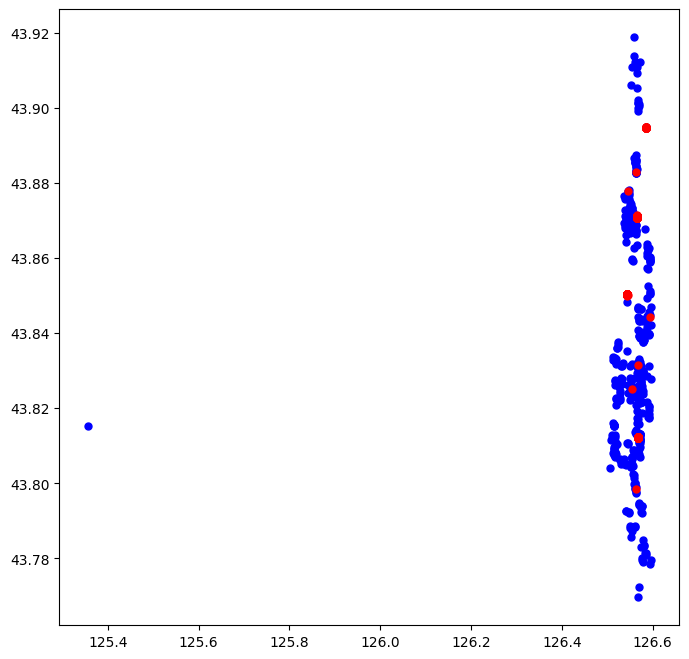

In [ ]:
plt.scatter(x=df_date['delivery_gps_lng'], y=df_date['delivery_gps_lat'], c="blue", s=25)
# plt.scatter(x=df_date['lng'], y=df_date['lat'], c="red")
plt.scatter(x=df_date['accept_gps_lng'], y=df_date['accept_gps_lat'], c="red", s=25)

plt.show()

In [ ]:
df_date['region_id'].value_counts().sort_index()

region_id
31     153
53     188
129     63
165     19
Name: count, dtype: int64

# Group by courier_id and ds

## TODO: Label the Sections of this Notebook

In [ ]:
# columns of interest
coi = ["order_id", "courier_id", \
    "accept_gps_time", "accept_gps_lng", "accept_gps_lat", \
    "delivery_gps_time", "delivery_gps_lng", "delivery_gps_lat", \
    "ds"]
df_coords = df[coi]

df_courier_ds = df_coords.sort_values(
    ["accept_gps_time", "delivery_gps_time"]).groupby(
    ["ds", "courier_id"])

for x in df_courier_ds.groups:
    print("ds = {ds}; courier_id = {cid}".format(ds=x[0],cid=x[1]))

ds = 722; courier_id = 2709
ds = 722; courier_id = 2925
ds = 722; courier_id = 3156
ds = 722; courier_id = 4474
ds = 722; courier_id = 4849
ds = 723; courier_id = 75
ds = 723; courier_id = 435
ds = 723; courier_id = 487
ds = 723; courier_id = 638
ds = 723; courier_id = 949
ds = 723; courier_id = 1103
ds = 723; courier_id = 1656
ds = 723; courier_id = 2688
ds = 723; courier_id = 2709
ds = 723; courier_id = 2925
ds = 723; courier_id = 3156
ds = 723; courier_id = 4474
ds = 723; courier_id = 4849
ds = 724; courier_id = 75
ds = 724; courier_id = 435
ds = 724; courier_id = 487
ds = 724; courier_id = 638
ds = 724; courier_id = 949
ds = 724; courier_id = 1103
ds = 724; courier_id = 1656
ds = 724; courier_id = 2688
ds = 724; courier_id = 2709
ds = 724; courier_id = 2925
ds = 724; courier_id = 3156
ds = 724; courier_id = 4474
ds = 724; courier_id = 4849
ds = 725; courier_id = 75
ds = 725; courier_id = 435
ds = 725; courier_id = 487
ds = 725; courier_id = 638
ds = 725; courier_id = 949
ds = 725; 

In [ ]:
df_groups = [df_courier_ds.get_group(x) for x in df_courier_ds.groups]
print(len(df_groups))

display(df_groups[1842])

1856


,order_id,courier_id,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
29753,1475657,1656,10-17 09:00:00,126.58465,43.89478,10-17 15:21:00,126.58467,43.89469,1017
28195,61266,1656,10-17 09:10:00,126.58487,43.89476,10-17 15:26:00,126.58464,43.89473,1017
30064,352909,1656,10-17 09:17:00,126.58481,43.89472,10-17 20:27:00,126.53369,43.86301,1017
28199,3496184,1656,10-17 09:17:00,126.58486,43.89470,10-17 21:02:00,126.53352,43.86305,1017
30160,544679,1656,10-17 09:18:00,126.58474,43.89477,10-17 20:22:00,126.53343,43.86295,1017
30890,1937486,1656,10-17 09:31:00,126.58469,43.89471,10-17 13:27:00,126.55472,43.91295,1017
28234,1975644,1656,10-17 09:31:00,126.58467,43.89468,10-17 15:44:00,126.58469,43.89463,1017
28615,2559837,1656,10-17 09:32:00,126.58479,43.89477,10-17 11:03:00,126.55313,43.91129,1017
29450,1129706,1656,10-17 09:32:00,126.58479,43.89467,10-17 11:26:00,126.55187,43.90807,1017
30450,203056,1656,10-17 09:32:00,126.58479,43.89475,10-17 14:18:00,126.54847,43.90071,1017


In [ ]:
for ds, courier in df_courier_ds.groups:
    df_tsp = df_courier_ds.get_group((ds, courier))

In [ ]:
def generate_accept_df(df_tsp, heuristic):
    # Drop delivery-related information to find depot nodes
    df_accept = df_tsp.drop(
        labels=['delivery_gps_time', 'delivery_gps_lng', 'delivery_gps_lat'], 
        axis=1, inplace=False)

    # Rename columns to standardise for concatenation
    df_accept = df_accept.rename(
        columns={"accept_gps_time": "gps_time", "accept_gps_lng": "gps_lng", "accept_gps_lat": "gps_lat"})
    
    # Create column to determine if point is depot
    df_accept["depot"] = 1

    ## Note: NAIVE HEURISTIC is used to find depot points
    # Round Coordinates to 3 d.p. and drop Duplicates as couriers may be sharing the same depots
    if heuristic:
        df_accept.drop(labels=["order_id"], axis=1, inplace=True)
        df_accept = df_accept.round(3)
        df_accept = df_accept.drop_duplicates(subset=['gps_lng', 'gps_lat'], keep="first")
    
    return df_accept

In [ ]:
df_accept = generate_accept_df(df_groups[1842], heuristic=True)
print(df_accept.shape)
display(df_accept)

(2, 6)


,courier_id,gps_time,gps_lng,gps_lat,ds,depot
29753,1656,10-17 09:00:00,126.585,43.895,1017,1
28623,1656,10-17 13:41:00,126.551,43.910,1017,1


In [ ]:
def generate_deliver_df(df_tsp):
    # Drop depot-related information to find delivery nodes
    df_deliver = df_tsp.drop(
        labels=['accept_gps_time', 'accept_gps_lng', 'accept_gps_lat'], axis=1, inplace=False)

    # Rename columns to standardise for concatenation
    df_deliver = df_deliver.rename(
        columns={"delivery_gps_time": "gps_time", "delivery_gps_lng": "gps_lng", "delivery_gps_lat": "gps_lat"})
    
    # Create column to determine if point is not depot
    df_deliver["depot"] = 0

    return df_deliver

In [ ]:
df_deliver = generate_deliver_df(df_groups[1842])
print(df_deliver.shape)
display(df_deliver)

(12, 7)


,order_id,courier_id,gps_time,gps_lng,gps_lat,ds,depot
29753,1475657,1656,10-17 15:21:00,126.58467,43.89469,1017,0
28195,61266,1656,10-17 15:26:00,126.58464,43.89473,1017,0
30064,352909,1656,10-17 20:27:00,126.53369,43.86301,1017,0
28199,3496184,1656,10-17 21:02:00,126.53352,43.86305,1017,0
30160,544679,1656,10-17 20:22:00,126.53343,43.86295,1017,0
30890,1937486,1656,10-17 13:27:00,126.55472,43.91295,1017,0
28234,1975644,1656,10-17 15:44:00,126.58469,43.89463,1017,0
28615,2559837,1656,10-17 11:03:00,126.55313,43.91129,1017,0
29450,1129706,1656,10-17 11:26:00,126.55187,43.90807,1017,0
30450,203056,1656,10-17 14:18:00,126.54847,43.90071,1017,0


In [ ]:
def plot_coordinates(df_accept, df_deliver, ds, courier, save_fig, show_fig, parent_dir):
    # clear figure
    plt.clf()

    # plot scatter plot for depot and destination nodes
    plt.scatter(x=df_deliver['gps_lng'], y=df_deliver['gps_lat'], c="blue", s=25)
    plt.scatter(x=df_accept['gps_lng'], y=df_accept['gps_lat'], c="red", s=25)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geocoordinate plot for Date={ds}, Courier={courier}".format(courier=courier,ds=ds))
    
    # show plot
    if show_fig and not save_fig:
        plt.show()

    # save plot
    if save_fig and not show_fig:
        num_depots = df_accept.shape[0]

        dir_path = parent_dir + "/coordinates/{num_depots}".format(
            num_depots=num_depots)
        try:
            if not os.path.exists(dir_path):
                os.makedirs(dir_path)
        except OSError as err:
            print(err)
        
        path = dir_path + "/ds_{ds}_courier_{courier}.png".format(
            ds=ds, courier=courier)
        plt.savefig(path, dpi=500)
    
    plt.clf()
    return

#### Generate Pairwise Haversine Distances

In [ ]:
from sklearn.metrics import DistanceMetric
from math import radians

def generate_pairwise_dist(df_gps):
    # Convert gps coordinates to radians
    df_gps_rads = df_gps.copy()
    df_gps_rads['gps_lng'] = np.radians(df_gps['gps_lng'])
    df_gps_rads['gps_lat'] = np.radians(df_gps['gps_lat'])

    # Compute pairwise haversine distances
    dist = DistanceMetric.get_metric('haversine')
    df_pwise_dist = pd.DataFrame(
        dist.pairwise(df_gps_rads[['gps_lat','gps_lng']].to_numpy())*6378*1000, 
        columns=df_gps_rads.index, index=df_gps_rads.index)

    return df_pwise_dist


def save_pairwise_dist(df_pwise_dist, ds, courier, parent_dir):
    dir_path = parent_dir + "/ds_{ds}_courier_{courier}".format(
            ds=ds, courier=courier)

    # Create directories if absent
    try:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
    except OSError as err:
        print(err)

    # Save pairwise distances as csv
    csv_path = dir_path + "/pairwise.csv"
    df_pwise_dist.to_csv(csv_path)

    # Save pairwise distances as npz
    npz_path = dir_path + "/pairwise.npz"
    np.savez(npz_path, df_pwise_dist.to_numpy())

In [ ]:
import orjson as json

def save_tsp_instances(df_gps, df_accept, df_deliver, ds, courier, parent_dir):
    dir_path = parent_dir + "/ds_{ds}_courier_{courier}".format(
            ds=ds, courier=courier)

    # Create directories if absent while handling errors due to parallelism
    try:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
    except OSError as err:
        print(err)

    # Save dataframe of coordinates + other info as csv
    csv_path = dir_path + "/data.csv"
    df_gps.to_csv(csv_path)

    # Save metadata as json
    metadata = {}
    metadata["date"] = ds
    metadata["courier_id"] = courier
    metadata["num_depots"] = df_accept.shape[0]
    metadata["num_destinations"] = df_deliver.shape[0]
    metadata["features"] = df_gps.columns.to_list()
    
    json_path = dir_path + "/metadata.json"
    with open(json_path, "wb") as outfile:
        outfile.write(json.dumps(metadata))

In [ ]:
def check_num_depots(df_accept):
    if df_accept.shape[0] == 0:
        result = "No depot is found!"
        # print(result)
        one_depot_only = False

    elif df_accept.shape[0] > 1:
        result = "More than 1 depot is found!"
        # print(result)
        one_depot_only = False

    else:
        result = "Only 1 depot is found!"
        # print(result)
        one_depot_only = True
    
    return result, one_depot_only

In [ ]:
def combine_depots(df_accept, threshold):
    # Calculate haversine pairwise distances among all depots
    df_pwise_dist = generate_pairwise_dist(df_accept)
    # display(df_pwise_dist)

    # Get the largest distance between 2 depots
    max_dist = df_pwise_dist.max(axis=None)
    # print(max_dist)

    # If the largest distance < threshold, treat the cluster of geocoordinates 
    # as 1 depot by taking average values
    if max_dist < threshold:
        accept_dict = { "courier_id": int(df_accept["courier_id"].mean()),
                        "gps_lng": df_accept["gps_lng"].mean(),
                        "gps_lat": df_accept["gps_lat"].mean(),
                        "ds": int(df_accept["ds"].mean()),
                        "depot": int(df_accept["depot"].mean())
                    }
        df_accept = pd.DataFrame([accept_dict])
        # display(df_accept)
    
    return df_accept

In [ ]:
df_accept = generate_accept_df(df_groups[1842], heuristic=False)
print(df_accept.shape)
display(df_accept)

df_acceptv2 = combine_depots(df_accept, 3200)

(12, 7)


,order_id,courier_id,gps_time,gps_lng,gps_lat,ds,depot
29753,1475657,1656,10-17 09:00:00,126.58465,43.89478,1017,1
28195,61266,1656,10-17 09:10:00,126.58487,43.89476,1017,1
30064,352909,1656,10-17 09:17:00,126.58481,43.89472,1017,1
28199,3496184,1656,10-17 09:17:00,126.58486,43.89470,1017,1
30160,544679,1656,10-17 09:18:00,126.58474,43.89477,1017,1
30890,1937486,1656,10-17 09:31:00,126.58469,43.89471,1017,1
28234,1975644,1656,10-17 09:31:00,126.58467,43.89468,1017,1
28615,2559837,1656,10-17 09:32:00,126.58479,43.89477,1017,1
29450,1129706,1656,10-17 09:32:00,126.58479,43.89467,1017,1
30450,203056,1656,10-17 09:32:00,126.58479,43.89475,1017,1


In [ ]:
def generate_tsp_instances(df_tsp, threshold, ds, courier, heuristic, save, show, save_dir, statement):
    # Track progress of execution in for loop (Not useful as the execution is out-of-order)
    if statement is not None:
        print(statement)

    # Generate depot and destination nodes
    df_deliver = generate_deliver_df(df_tsp)
    df_accept = generate_accept_df(df_tsp, heuristic)

    # Combine depots if all pairwise distances among depots are less than threshold
    if threshold > 0:
        df_accept = combine_depots(df_accept, threshold)
    
    # Create scatter plots of depot and destination nodes
    plot_coordinates(df_accept, df_deliver, ds, courier, save, show, save_dir)

    # Conditions to execute based on number of depot nodes
    result, one_depot_only = check_num_depots(df_accept)
    
    # Combine depot and destination nodes into 1 dataframe
    df_gps = pd.concat([df_accept, df_deliver], join="outer", ignore_index=True)

    # Save data related to each TSP instances
    ## Version 1 - Organise by problem instance directly
    save_dir = save_dir + "/instances"

    ## Version 2 - Organise by number of depots & number of destinations as directories (nested directories)
    ## Requires num_depots and num_dests as additional function arguments
    num_depots = df_accept.shape[0]
    num_dests = df_deliver.shape[0]
    save_dir = save_dir + "/{num_depots}/{num_dests}".format(
        num_depots=num_depots, num_dests=num_dests)
    
    # Save tsp instances
    if save:
        save_tsp_instances(df_gps, df_accept, df_deliver, ds, courier, save_dir)

    # Generate and save pairwise haversine distance
    df_pwise_dist = generate_pairwise_dist(df_gps)
    if save:
        save_pairwise_dist(df_pwise_dist, ds, courier, save_dir)
    
    return df_gps, result, one_depot_only

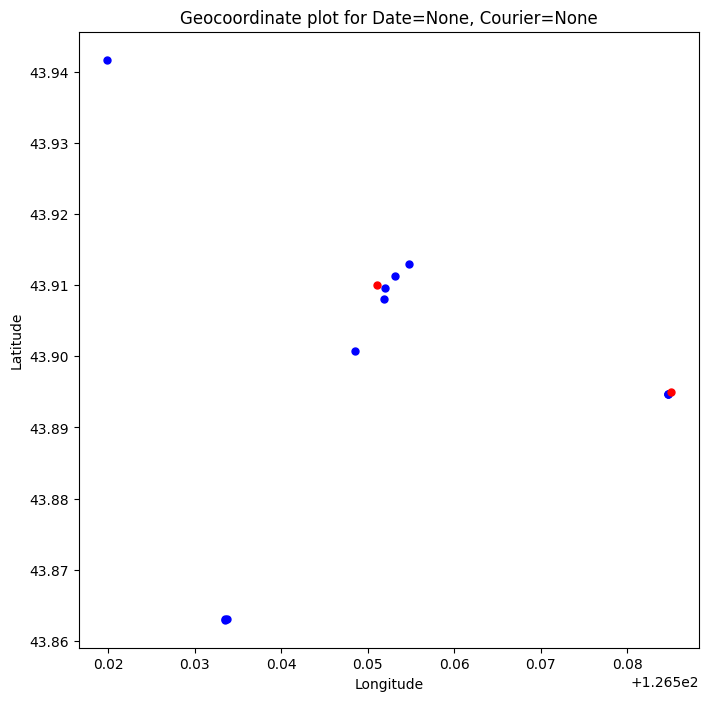

<Figure size 800x800 with 0 Axes>

In [ ]:
df_combined, result, one_depot_only = generate_tsp_instances(
    df_groups[1842], threshold=500, ds=None, courier=None, heuristic=True, save=False, show=True, save_dir="/work", statement=None)

In [ ]:
display(df_combined)

,courier_id,gps_time,gps_lng,gps_lat,ds,depot,order_id
0,1656,10-17 09:00:00,126.58500,43.89500,1017,1,NaN
1,1656,10-17 13:41:00,126.55100,43.91000,1017,1,NaN
2,1656,10-17 15:21:00,126.58467,43.89469,1017,0,1475657.0
3,1656,10-17 15:26:00,126.58464,43.89473,1017,0,61266.0
4,1656,10-17 20:27:00,126.53369,43.86301,1017,0,352909.0
5,1656,10-17 21:02:00,126.53352,43.86305,1017,0,3496184.0
6,1656,10-17 20:22:00,126.53343,43.86295,1017,0,544679.0
7,1656,10-17 13:27:00,126.55472,43.91295,1017,0,1937486.0
8,1656,10-17 15:44:00,126.58469,43.89463,1017,0,1975644.0
9,1656,10-17 11:03:00,126.55313,43.91129,1017,0,2559837.0


In [ ]:
# Full execution
def execute_tsp_generation(df, threshold, heuristic, save, show, save_dir):
    # Group full dataset by courier_id and date
    df_courier_ds = df.sort_values(
    ["accept_gps_time", "delivery_gps_time"]).groupby(
    ["ds", "courier_id"])

    # Track total as count and instances with 1 depot as success
    count = 0
    success = 0

    # Enumerate through the groups to generate tsp instances and pairwise distances
    for ind, (ds, courier) in enumerate(df_courier_ds.groups):
        statement = "Index: {ind} Date: {ds} Courier: {courier}".format(ind=ind, ds=ds, courier=courier)
        df_tsp = df_courier_ds.get_group((ds, courier))
        # Note: df_gps is not even used
        df_gps, result, one_depot_only = generate_tsp_instances(df_tsp, threshold, ds, courier, heuristic, save, show, save_dir, statement)
        
        if one_depot_only:
            success += 1
        elif result == "No depot is found!":
            break
        count += 1

    return success, count

In [ ]:
from multiprocessing import Pool

def execute_tsp_generation_parallel(df, threshold, heuristic, save, show, save_dir):
    # Group full dataset by courier_id and date
    df_courier_ds = df.sort_values(
    ["accept_gps_time", "delivery_gps_time"]).groupby(
    ["ds", "courier_id"])

    # Track total as count and instances with 1 depot as success
    count = 0
    success = 0

    inputs_list = []
    # Enumerate through the groups to generate tsp instances and pairwise distances
    for ind, (ds, courier) in enumerate(df_courier_ds.groups):
        statement = "Index: {ind} Date: {ds} Courier: {courier}".format(ind=ind, ds=ds, courier=courier)
        df_tsp = df_courier_ds.get_group((ds, courier))
        # Note: df_gps is not even used
        input_args = (df_tsp, threshold, ds, courier, heuristic, save, show, save_dir, statement)
        inputs_list.append(input_args)
    
    with Pool() as pool: #can specify num_workers inside Pool()
        for outputs in pool.starmap(generate_tsp_instances, inputs_list):
            df_gps, result, one_depot_only = outputs
            if one_depot_only:
                success += 1
            elif result == "No depot is found!":
                break
            count += 1

    return success, count

In [ ]:
# Wall time - 47min 28s
SAVE_DIR = "/work/processed_heuristic-threshold"
success, total = execute_tsp_generation_parallel(df=df_coords, threshold=500, heuristic=True, save=True, show=False, save_dir=SAVE_DIR)
print(success, total, success/total)

Index: 916 Date: 727 Courier: 487
Index: 572 Date: 629 Courier: 4849
Index: 630 Date: 704 Courier: 2709
Index: 746 Date: 713 Courier: 2925
Index: 802 Date: 718 Courier: 435
Index: 860 Date: 722 Courier: 4474
Index: 688 Date: 709 Courier: 435
Index: 516 Date: 625 Courier: 2925
Index: 917 Date: 727 Courier: 638
Index: 573 Date: 630 Courier: 75
Index: 631 Date: 704 Courier: 2925
Index: 747 Date: 713 Courier: 3156Index: 803 Date: 718 Courier: 487

Index: 861 Date: 722 Courier: 4849
Index: 517 Date: 625 Courier: 3458
Index: 689 Date: 709 Courier: 487
Index: 918 Date: 727 Courier: 949
Index: 574 Date: 630 Courier: 435
Index: 632 Date: 704 Courier: 4474
Index: 804 Date: 718 Courier: 638
Index: 748 Date: 713 Courier: 4474
Index: 862 Date: 723 Courier: 75
Index: 518 Date: 625 Courier: 4474
Index: 690 Date: 709 Courier: 638
Index: 575 Date: 630 Courier: 487
Index: 633 Date: 704 Courier: 4849
Index: 919 Date: 727 Courier: 1103
Index: 749 Date: 713 Courier: 4849
Index: 519 Date: 625 Courier: 4849


In [ ]:
# Wall time - > 44min 38s
SAVE_DIR = "/work/processed_full-threshold"
success, total = execute_tsp_generation_parallel(df=df_coords, threshold=500, heuristic=False, save=True, show=False, save_dir=SAVE_DIR)
print(success, total, success/total)

Index: 802 Date: 718 Courier: 435
Index: 572 Date: 629 Courier: 4849
Index: 915 Date: 727 Courier: 435
Index: 516 Date: 625 Courier: 2925
Index: 689 Date: 709 Courier: 487
Index: 746 Date: 713 Courier: 2925
Index: 631 Date: 704 Courier: 2925
Index: 803 Date: 718 Courier: 487
Index: 859 Date: 722 Courier: 3156
Index: 916 Date: 727 Courier: 487
Index: 517 Date: 625 Courier: 3458
Index: 690 Date: 709 Courier: 638
Index: 573 Date: 630 Courier: 75
Index: 632 Date: 704 Courier: 4474Index: 747 Date: 713 Courier: 3156

Index: 804 Date: 718 Courier: 638
Index: 860 Date: 722 Courier: 4474
Index: 518 Date: 625 Courier: 4474
Index: 917 Date: 727 Courier: 638
Index: 691 Date: 709 Courier: 949
Index: 574 Date: 630 Courier: 435
Index: 633 Date: 704 Courier: 4849Index: 805 Date: 718 Courier: 949

Index: 748 Date: 713 Courier: 4474
Index: 861 Date: 722 Courier: 4849
Index: 519 Date: 625 Courier: 4849
Index: 692 Date: 709 Courier: 1103
Index: 918 Date: 727 Courier: 949
Index: 575 Date: 630 Courier: 487


<hr>

## TODO: Label the section and Split notebook here if the contents deviate from the `Theme` of this notebook i.e. EDA and Data Processing

In [ ]:
multiple_depots = df.copy()
multiple_depots = generate_accept_df(multiple_depots, False)
multiple_depots.sort_values(by='ds')

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,gps_time,gps_lng,gps_lat,delivery_time,ds,depot
15244,472199,53,Jilin,75,126.56609,43.81726,37082,1,05-13 18:20:00,05-13 18:20:00,126.56687,43.81219,05-13 19:06:00,513,1
2289,1519322,31,Jilin,949,126.58767,43.86217,13549,1,05-13 08:41:00,05-13 08:41:00,126.56592,43.87123,05-13 14:40:00,513,1
18010,3785951,53,Jilin,318,126.53137,43.80559,53514,1,05-13 14:30:00,05-13 14:30:00,126.53728,43.80470,05-13 21:25:00,513,1
24999,622848,129,Jilin,588,126.49141,43.81473,49059,1,05-13 15:54:00,05-13 15:54:00,126.54437,43.85032,05-13 17:04:00,513,1
30761,2560887,165,Jilin,2709,126.57520,43.89618,52137,14,05-13 19:43:00,05-13 19:43:00,126.58469,43.89469,05-13 21:08:00,513,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,2955702,31,Jilin,1558,126.59488,43.88171,21649,0,10-21 08:29:00,10-21 08:29:00,126.56632,43.87071,10-21 15:13:00,1021,1
30316,2495972,165,Jilin,1656,126.55489,43.91098,46879,3,10-22 09:38:00,10-22 09:38:00,126.58475,43.89476,10-22 17:13:00,1022,1
23352,1072414,129,Jilin,87,126.55595,43.83930,36317,10,10-22 10:23:00,10-22 10:23:00,126.54432,43.85040,10-22 13:35:00,1022,1
27871,2179802,165,Jilin,1656,126.57510,43.93020,1157,1,10-26 08:20:00,10-26 08:20:00,126.58470,43.89467,10-26 13:41:00,1026,1


In [ ]:
multiple_depots = df.copy()
multiple_depots.sort_values(by='ds')
multiple_depots = generate_accept_df(multiple_depots, True).sort_values(by=['ds', 'courier_id'])
multiple_depots

,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,gps_time,gps_lng,gps_lat,delivery_time,ds,depot
28612,165,Jilin,1656,126.553,43.911,16214,1,05-15 14:31:00,05-15 14:31:00,126.554,43.910,05-15 14:35:00,515,1
29385,165,Jilin,1656,126.547,43.908,32120,1,05-15 15:22:00,05-15 15:22:00,126.547,43.907,05-15 15:28:00,515,1
29456,165,Jilin,1656,126.550,43.909,32278,14,05-15 14:40:00,05-15 14:40:00,126.553,43.911,05-15 14:45:00,515,1
30341,165,Jilin,1656,126.554,43.910,47911,14,05-15 14:17:00,05-15 14:17:00,126.554,43.912,05-15 14:18:00,515,1
2411,31,Jilin,949,126.548,43.869,13919,1,05-16 13:51:00,05-16 13:51:00,126.567,43.870,05-16 15:07:00,516,1
2419,31,Jilin,949,126.548,43.869,13919,1,05-16 13:51:00,05-16 13:51:00,126.568,43.870,05-16 14:54:00,516,1
22570,129,Jilin,588,126.497,43.812,27438,1,05-17 14:15:00,05-17 14:15:00,126.497,43.812,05-17 14:15:00,517,1
30162,165,Jilin,1656,126.630,43.886,42556,1,05-17 18:24:00,05-17 18:24:00,126.629,43.886,05-17 18:30:00,517,1
30294,165,Jilin,3156,126.555,43.900,46151,1,05-17 11:33:00,05-17 11:33:00,126.555,43.899,05-17 11:38:00,517,1
3869,31,Jilin,4849,126.569,43.842,26637,14,05-17 13:11:00,05-17 13:11:00,126.571,43.842,05-17 13:21:00,517,1


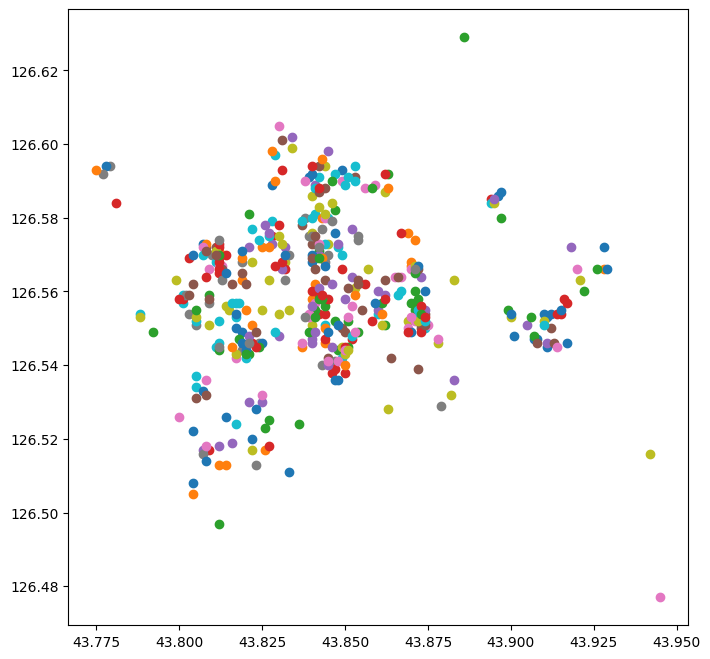

In [ ]:
days = {}

for idx in range(len(multiple_depots)):
    if multiple_depots['ds'].iloc[idx] in days.keys():
        days[multiple_depots['ds'].iloc[idx]].append((multiple_depots['gps_lng'].iloc[idx], multiple_depots['gps_lat'].iloc[idx]))
    else:
        days[multiple_depots['ds'].iloc[idx]] = []
        days[multiple_depots['ds'].iloc[idx]].append((multiple_depots['gps_lng'].iloc[idx], multiple_depots['gps_lat'].iloc[idx]))

for day in days.values():
    lats = []
    lngs = []
    for loc in day:
        lngs.append(loc[0])
        lats.append(loc[1])
    plt.scatter(lats, lngs)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf2edc64-aead-4b81-a3fd-24d0376819e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>